#**Drive Mount**

In [ ]:
#mount drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive

# list the contents of /mydrive
!ls /mydrive
#Navigate to /mydrive/Modern_Computer_Vision/

%cd /mydrive/Modern_Computer_Vision/

/
Mounted at /content/gdrive
'2023-03-15 10-13-53.mkv'
 76f6e21a-3c3f-4deb-98fc-b62f0d959cd2.jfif.gdoc
'age '
 AI
 build
 cataract
 Classroom
'Colab Notebooks'
 Computer_Vision
 cotton_plant_cnn_50_Epochs_1122668_params.h5
 densenet_v1.h5
 densenet_v2.h5
 densenet_v3.h5
 densenet_v4.h5
 diab
 diamond.c
 EE352_Lab5.gdoc
 EE352_Lab8_260206035-260206037-260206038.gdoc
'EE491 PROJECT'
 EE492
 fitzpatrick17
'Fundamentals of Physics Extended 8th Edition By Halliday and Resnick.gdoc'
 glaucoma
 Grad_Project_Attention_U-Net_Burak_Aktaş_Doğa_Deniz_Ateş.docx
 grizu-263_Space_Team_CanSat_Competition_2019_PDR.gdoc
 hyper
'İŞLEM YAPTIĞIMIZ SEMRUK PDR .pptx .pptx'
 keras-retinanet-master
 maskkkk.json
 model.h5
 my_data.csv
'My Drive'
 myopia
 newdoa_glucomav2_dense3
 newdoa_glucomav3_dense3
 newdoa_hypertensive_dense3
 newdoa_hypertensive_dense4
 newdoa_hypertensive_v2_dense3
 newdoa_hypertensive_v2_dense4
 newdoa_hypertensive_v3_dense3
 new_hyper
 normal
 other
 Plant-Health-Detection-using-

/content/gdrive/MyDrive/Computer_Vision/directory_Plant_Segmentation


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import random
import cv2
import tensorflow as tf
# from segmentation import build_unet, vgg16_unet, vgg19_unet, resnet50_unet, inception_resnetv2_unet, densenet121_unet
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import f1_score

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Dec 13 06:08:04 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


#**GPU Check**

In [ ]:
!nvidia-smi -L

GPU 0: A100-SXM4-40GB (UUID: GPU-f252d22f-47ad-3c48-e2ab-19e406947cc4)


In [ ]:
tf.test.gpu_device_name()

''

In [ ]:
if tf.test.gpu_device_name():
  print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
  print("Please install GPU version of TF")

Please install GPU version of TF


In [ ]:
tf.config.experimental.list_physical_devices('GPU')

[]

#**CPU - GPU Usage Check**

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15334360569985550101
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14415560704
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9807744781997367028
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
pip install tensorflow-gpu

#**Ram Check**

In [ ]:
!cat /proc/meminfo

#**Data Gathering**

In [ ]:
base_directory = './NEW_100_5100dataset/'
images_folder = os.path.join(base_directory, 'images')
masks_folder = os.path.join(base_directory, 'masks')
data = pd.read_csv(os.path.join(base_directory, 'output.csv'))

FileNotFoundError: ignored

In [ ]:
base_directory = './NEW_3000data_5100dataset/3000_5100dataset_newmasks/'
images_folder = os.path.join(base_directory, 'images')
masks_folder = os.path.join(base_directory, 'masks')
data = pd.read_csv(os.path.join(base_directory, 'output.csv'))

In [ ]:
#base_directory = './NEW_5100data_5106newmask/5108_5100dataset_newmasks/'
base_directory = '/content/gdrive/MyDrive/Modern_Computer_Vision/directory_Plant_Segmentation/5100data_5100new'
images_folder = os.path.join(base_directory, 'images')
masks_folder = os.path.join(base_directory, 'masks')
data = pd.read_csv(os.path.join(base_directory, 'output.csv'))

In [ ]:
base_directory = './High_Quality_Data/'
images_folder = os.path.join(base_directory, 'images')
masks_folder = os.path.join(base_directory, 'masks')
data = pd.read_csv(os.path.join(base_directory, 'meta_data.csv'))

In [ ]:
base_directory = './High_Quality_Data/'
images_folder = os.path.join(base_directory, 'images')
masks_folder = os.path.join(base_directory, 'mask_reshape')
data = pd.read_csv(os.path.join(base_directory, 'meta_data.csv'))

In [ ]:
base_directory = './low_quality_data/'
images_folder = os.path.join(base_directory, 'images')
masks_folder = os.path.join(base_directory, 'masks')
data = pd.read_csv(os.path.join(base_directory, 'meta_data.csv'))

In [ ]:
base_directory = './5100data_5100new/'
images_folder = os.path.join(base_directory, 'images_new')
masks_folder = os.path.join(base_directory, 'masks')
data = pd.read_csv(os.path.join(base_directory, 'output.csv'))

In [ ]:
base_directory = './5100data_w_new_mask/'
images_folder = os.path.join(base_directory, 'images')
masks_folder = os.path.join(base_directory, 'masks')
data = pd.read_csv(os.path.join(base_directory, 'meta_data.csv'))

In [ ]:
base_directory = './data/Forest_Segmented/Forest_Segmented/'
images_folder = os.path.join(base_directory, 'images_old')
masks_folder = os.path.join(base_directory, 'masks')
data = pd.read_csv(os.path.join(base_directory, 'meta_data.csv'))

In [ ]:
base_directory = './data_v2/'
images_folder = os.path.join(base_directory, 'images')
masks_folder = os.path.join(base_directory, 'masks')
data = pd.read_csv(os.path.join(base_directory, 'meta_data.csv'))

In [ ]:
data.describe()

,image,mask
count,5108,5108
unique,5108,5108
top,10452_sat_08.jpg,0_masked_image.jpg
freq,1,1


In [ ]:
data.head()

,image,mask
0,10452_sat_08.jpg,0_masked_image.jpg
1,10452_sat_18.jpg,1_masked_image.jpg
2,111335_sat_00.jpg,2_masked_image.jpg
3,111335_sat_01.jpg,3_masked_image.jpg
4,111335_sat_02.jpg,4_masked_image.jpg


In [ ]:
print(data)

In [ ]:
img_dim = 256

In [ ]:
from PIL import Image
import io

In [ ]:

def input_target_split(data,images_folder,masks_folder,dim):
    dataset = []
    for index, row in data.iterrows():
        image = load_img(os.path.join(images_folder, row['image']), target_size=(dim,dim))
        mask = load_img(os.path.join(masks_folder, row['mask']), target_size=(dim,dim), color_mode='grayscale')
        image = img_to_array(image)
        image = image/255.0
        mask = img_to_array(mask)
        mask = mask/255.0
        dataset.append((image,mask))
        print(f"\rProgress: {index}",end='')
    random.shuffle(dataset)
    X, Y = zip(*dataset)

    return np.array(X),np.array(Y)

In [ ]:
import os
import random
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def input_target_split(data, images_folder, masks_folder, dim):
    dataset = []
    problematic_images = []

    for index, row in data.iterrows():
        image_path = os.path.join(images_folder, row['image'])
        mask_path = os.path.join(masks_folder, row['mask'])

        try:
            image = load_img(image_path, target_size=(dim, dim))
            mask = load_img(mask_path, target_size=(dim, dim), color_mode='grayscale')

            image = img_to_array(image)
            image = image / 255.0


            mask = img_to_array(mask)
            mask = mask / 255.0

            dataset.append((image, mask))
            print(f"\rProgress: {index}", end='')
        except Exception as e:
            problematic_images.append((index, image_path, mask_path, str(e)))

    if problematic_images:
        print("\nProblematic Images:")
        for idx, image_path, mask_path, error_message in problematic_images:
            print(f"Index: {idx}, Image: {image_path}, Mask: {mask_path}, Error: {error_message}")

    random.shuffle(dataset)
    X, Y = zip(*dataset)

    return np.array(X), np.array(Y)

#

In [ ]:
X, Y = input_target_split(data,images_folder,masks_folder,img_dim)

NameError: ignored

In [ ]:
print("Image Dimensions: ",X.shape)
print("Mask Dimensions: ",Y.shape)

Image Dimensions:  (5107, 256, 256, 3)
Mask Dimensions:  (5107, 256, 256, 1)


#**Data Visualization**

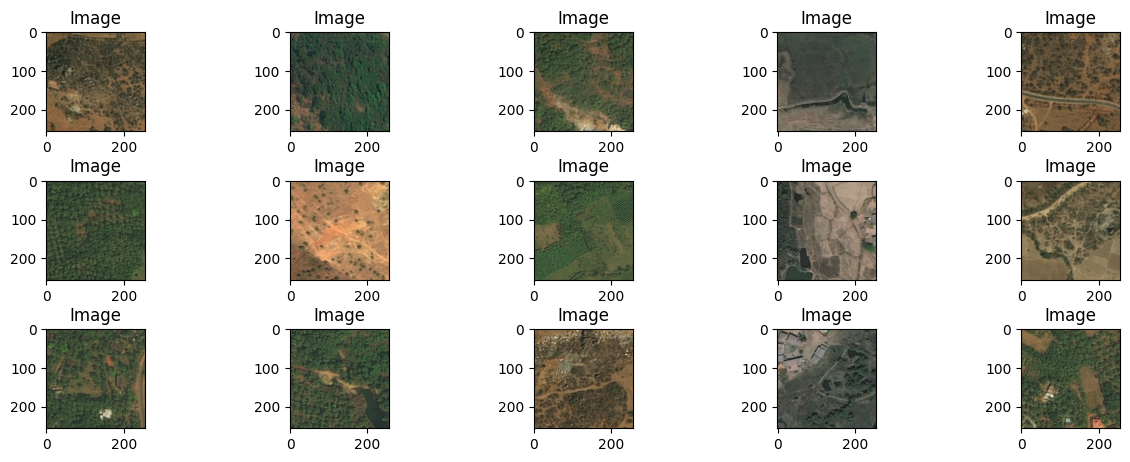

In [ ]:
plt.figure(figsize = (15 , 9))
n = 0
for i in range(15):
    n+=1
    plt.subplot(5 , 5, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    plt.imshow(X[i])
    plt.title('Image')

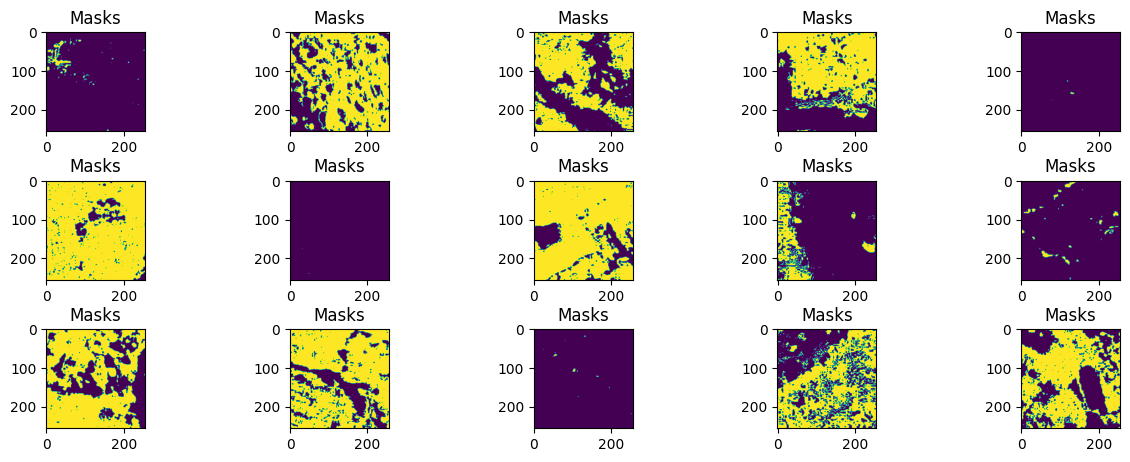

In [ ]:
plt.figure(figsize = (15 , 9))
n = 0
for i in range(15):
    n+=1
    plt.subplot(5 , 5, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    plt.imshow(np.squeeze(Y[i]))
    plt.title('Masks')

#**Data Arrangement**

In [ ]:
split_1 = round(X.shape[0]*0.70)
split_2 = round(X.shape[0]*0.90)
X_train = X[:split_1]
Y_train = Y[:split_1]
X_val = X[split_1:split_2]
Y_val = Y[split_1:split_2]
X_test = X[split_2:]
Y_test = Y[split_2:]

In [ ]:
datagen = ImageDataGenerator()
valgen = ImageDataGenerator()
testgen = ImageDataGenerator()

In [ ]:
datagen.fit(X_train)
valgen.fit(X_val)
testgen.fit(X_test)

#**U-Net Arch Implementation**

In [ ]:
def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_unet(input_shape):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 32)
    s2, p2 = encoder_block(p1, 64)
    s3, p3 = encoder_block(p2, 128)
    s4, p4 = encoder_block(p3, 256)

    b1 = conv_block(p4, 512)

    d1 = decoder_block(b1, s4, 256)
    d2 = decoder_block(d1, s3, 128)
    d3 = decoder_block(d2, s2, 64)
    d4 = decoder_block(d3, s1, 32)

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    model = Model(inputs, outputs, name="U-Net")
    return model

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras import backend as K

In [ ]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2.0 * intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1.0)


def iou_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)


def iou_coef_loss(y_true, y_pred):
    return -iou_coef(y_true, y_pred)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [ ]:
input_shape = (img_dim, img_dim, 3)
model = build_unet(input_shape)
model.summary()

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 32)         896       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 256, 256, 32)         128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 256, 256, 32)         0         ['batch_normalization[0][0

#**Dice or IoU Coef**

In [ ]:
#model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = ['binary_crossentropy'], metrics=[iou_coef,'accuracy'])

model.compile(optimizer = tf.keras.optimizers.Adam(lr = 1e-3), loss=dice_coef_loss, metrics=['accuracy', iou_coef])


#**Dice Coef**

In [ ]:
def dice_coef_loss(y_true,y_pred):
  y_true_f=K.flatten(y_true)
  y_pred_f=K.flatten(y_pred)
  intersection=K.sum(y_true_f*y_pred_f)
  return 1-(2*intersection)/(K.sum(y_true_f*y_true_f)+K.sum(y_pred_f*y_pred_f))

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = dice_coef_loss, metrics=[iou_coef,'accuracy'])

#**Training Part**

In [ ]:
model_path = "unet.h5"
checkpoint = ModelCheckpoint(model_path,
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 9,
                          verbose = 1,
                          restore_best_weights = True)
hist = model.fit(X_train, Y_train,
                    verbose=1,
                    batch_size = 10,
                    validation_data=(X_val, Y_val),
                    shuffle=False,
                    epochs=70)
model.save('UNet_50epochs.hdf5')

Epoch 1/70
358/358 [==============================] - 43s 83ms/step - loss: 0.0221 - iou_coef: 0.9135 - accuracy: 0.8521 - val_loss: 0.0160 - val_iou_coef: 0.9229 - val_accuracy: 0.8570
Epoch 2/70
358/358 [==============================] - 26s 74ms/step - loss: 0.0210 - iou_coef: 0.9159 - accuracy: 0.8528 - val_loss: 0.0158 - val_iou_coef: 0.9236 - val_accuracy: 0.8571
Epoch 3/70
358/358 [==============================] - 26s 73ms/step - loss: 0.0205 - iou_coef: 0.9172 - accuracy: 0.8531 - val_loss: 0.0156 - val_iou_coef: 0.9244 - val_accuracy: 0.8573
Epoch 4/70
358/358 [==============================] - 26s 74ms/step - loss: 0.0201 - iou_coef: 0.9184 - accuracy: 0.8534 - val_loss: 0.0154 - val_iou_coef: 0.9251 - val_accuracy: 0.8574
Epoch 5/70
358/358 [==============================] - 26s 74ms/step - loss: 0.0197 - iou_coef: 0.9194 - accuracy: 0.8536 - val_loss: 0.0153 - val_iou_coef: 0.9259 - val_accuracy: 0.8575
Epoch 6/70
358/358 [==============================] - 26s 74ms/step - 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-73-1f97843bceeb>", line 19, in <cell line: 19>
    model.save('UNet_50epochs.hdf5')
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/h5py/_hl/files.py", line 567, in __init__
    fid = make_fid(name, mode, userblock_size, fapl, fcpl, swmr=swmr)
  File "/usr/local/lib/python3.10/dist-packages/h5py/_hl/files.py", line 237, in make_fid
    fid = h5f.create(name, h5f.ACC_TRUNC, fapl=fapl, fcpl=fcpl)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5f.pyx", line 126, in h5py.h5f.create
OSError: [Errno 107] Unable

#**Performance Analysis**

In [ ]:
history_dict = hist.history
history_dict

In [ ]:
# Plotting our loss charts
import matplotlib.pyplot as plt

# Use the History object we created to get our saved performance results
history_dict = hist.history

# Extract the loss and validation losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Get the number of epochs and create an array up to that number using range()
epochs = range(1, len(loss_values) + 1)

# Plot line charts for both Validation and Training Loss
line1 = plt.plot(epochs, val_loss_values, label='Validation Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
#plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
#plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

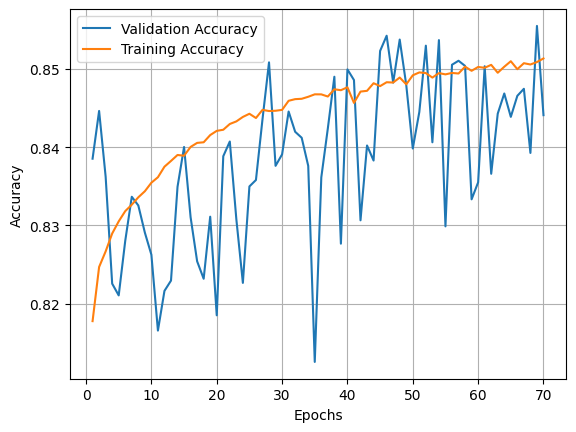

In [ ]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = hist.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
#plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
#plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

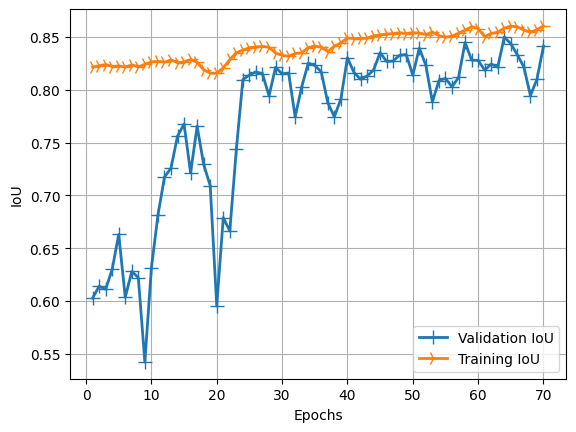

In [ ]:
# Plotting our loss charts
import matplotlib.pyplot as plt

# Use the History object we created to get our saved performance results
history_dict = hist.history

# Extract the loss and validation losses
loss_values = history_dict['iou_coef']
val_loss_values = history_dict['val_iou_coef']

# Get the number of epochs and create an array up to that number using range()
epochs = range(1, len(loss_values) + 1)

# Plot line charts for both Validation and Training Loss
line1 = plt.plot(epochs, val_loss_values, label='Validation IoU')
line2 = plt.plot(epochs, loss_values, label='Training IoU')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('IoU')
plt.grid(True)
plt.legend()
plt.show()

#**Save the Model**

In [ ]:
model.save("U-Net_Model.h5")
print("Model Saved")

Model Saved


In [ ]:
model.save_weights("U-Net_Model.h5")

In [ ]:
model.load_weights("U-Net_Model.h5")

#**Visualization of Results**

3/3 [==============================] - 1s 153ms/step


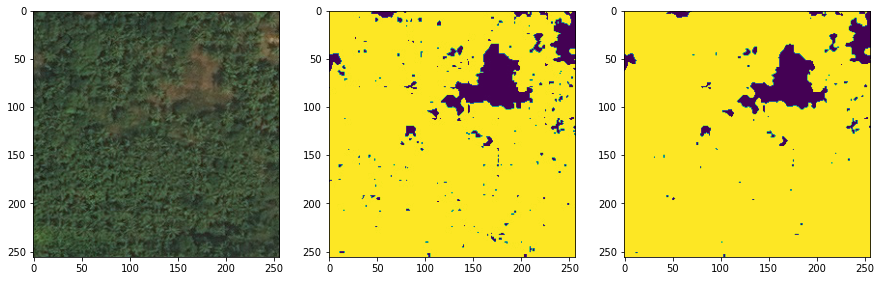

In [ ]:
plt.figure(figsize = (15 , 9))
result = model.predict(X_test)
output = result[0]
output[output >= 0.5] = 1
output[output < 0.5] = 0

plt.subplot(1, 3, 1)
plt.imshow(X_test[0])

plt.subplot(1, 3, 2)
plt.imshow(np.squeeze(Y_test[0]))

plt.subplot(1, 3, 3)
plt.imshow(np.squeeze(output))

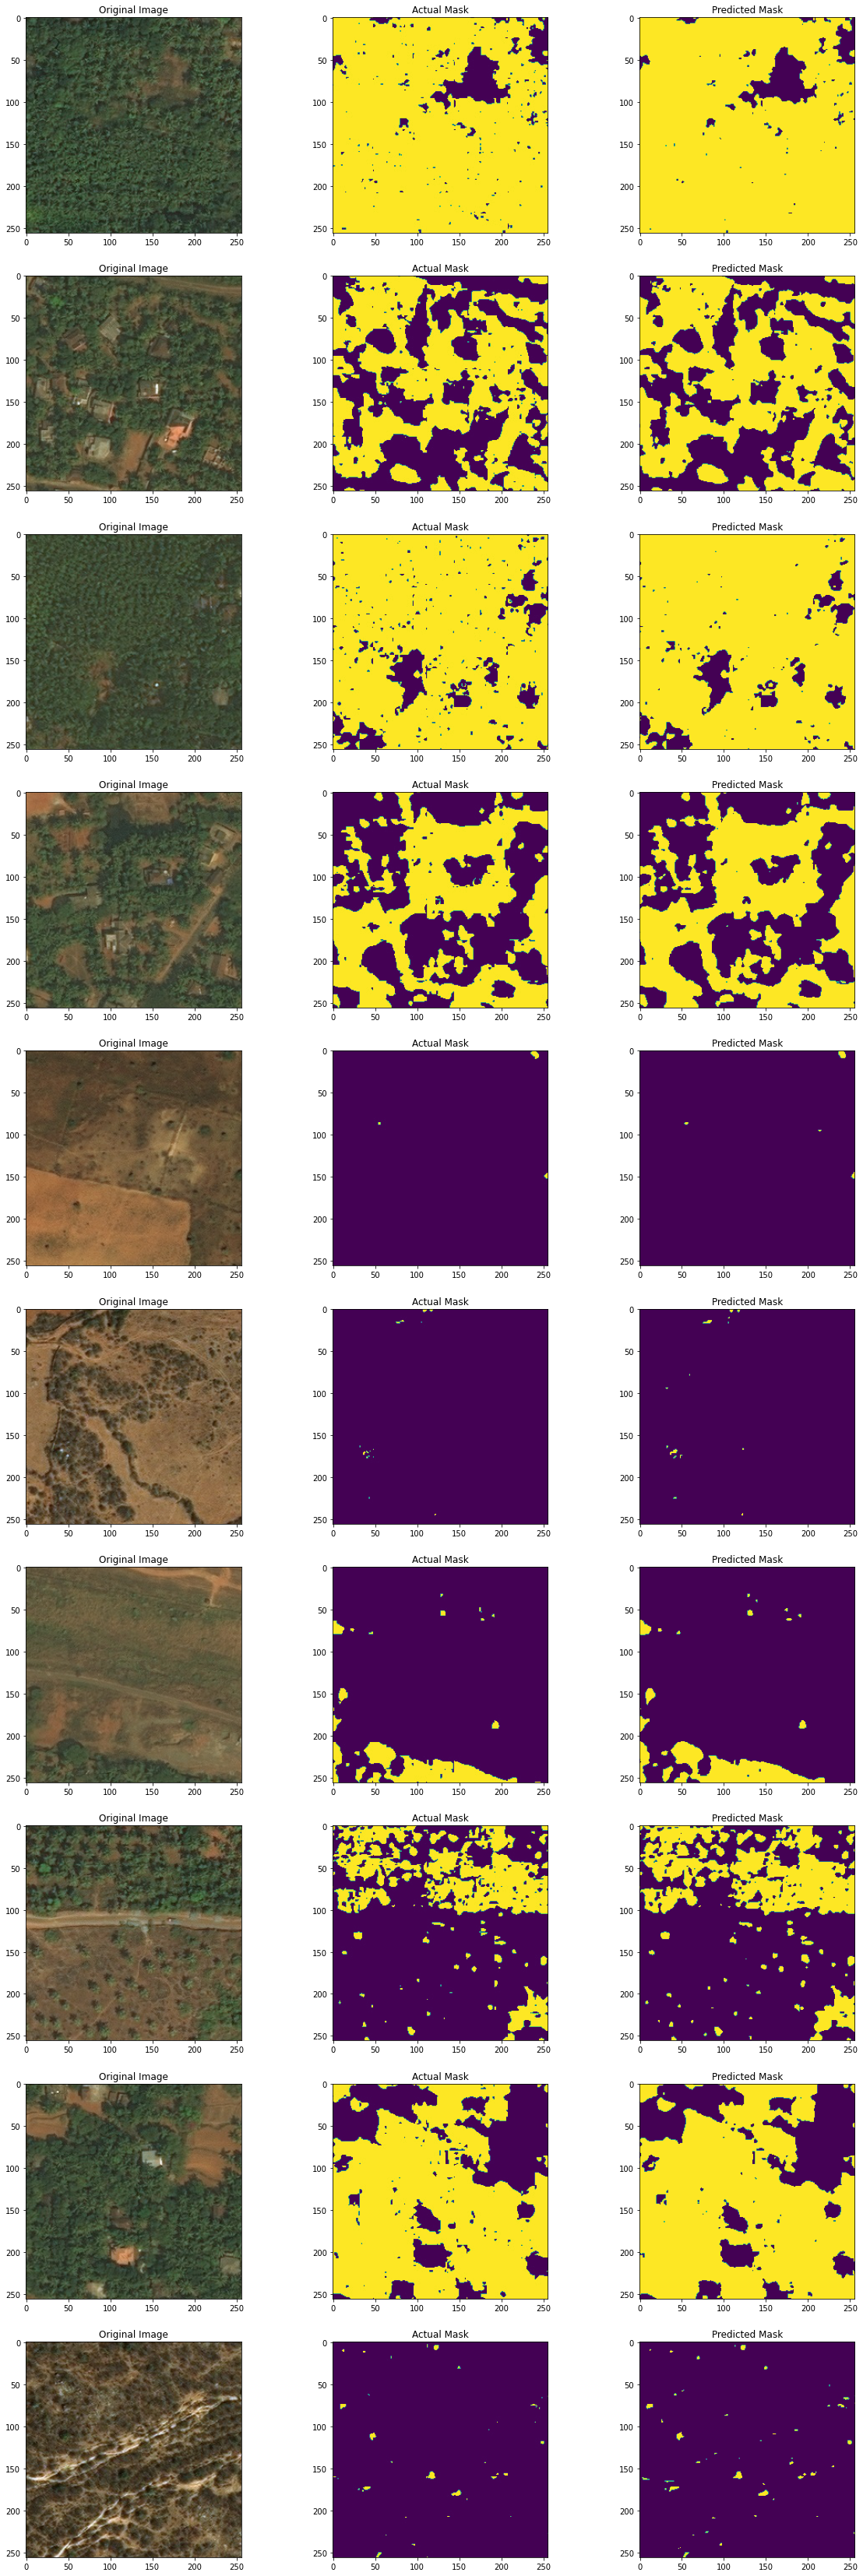

In [ ]:
f, axarr = plt.subplots(10,3,figsize=(20, 60))

for i in range(0,10):
    output = result[i]
    output[output >= 0.5] = 1
    output[output < 0.5] = 0

    axarr[i,0].imshow(X_test[i])
    axarr[i,0].title.set_text('Original Image')
    axarr[i,1].imshow(np.squeeze(Y_test[i]))
    axarr[i,1].title.set_text('Actual Mask')
    axarr[i,2].imshow(np.squeeze(output))
    axarr[i,2].title.set_text('Predicted Mask')

#**TF_LITE**

In [ ]:
#tf_lite convert
TF_LITE_MODEL_FILE_NAME = "tf_lite_model.tflite"

In [ ]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

In [ ]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

In [ ]:
import tensorflow as tf

# Create a model using high-level tf.keras.* APIs
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1]),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
model.compile(optimizer='sgd', loss='mean_squared_error') # compile the model
model.fit(x=[-1, 0, 1], y=[-3, -1, 1], epochs=50) # train the model
# (to generate a SavedModel) tf.saved_model.save(model, "saved_model_keras_dir")

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)